In [1]:
import urllib.request
import re
from bs4 import BeautifulSoup


In [2]:
base_url = "https://en.wikipedia.org"
initial_url = "https://en.wikipedia.org/wiki/COVID-19_pandemic"

In [3]:
def grab_soup(url):
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, "lxml")
    return soup

In [4]:
def extract_text(soup):
    text = ''
    for paragraph in soup.find_all('p'):
        text += paragraph.text
    text = re.sub(r'\[.*?\]+', '', text)
    text = text.replace('\n', '')
    return text

In [5]:
def extract_links(soup):
    extracted_links = []
    for paragraph in soup.find_all('p'):
        for a in paragraph.find_all('a', href=True):
            link = a['href']
            if "#cite_note" not in link:
                extracted_links.append(link)

    return extracted_links

In [6]:
def get_linked_page_text(extracted_links, text):
    for link in extracted_links:
        url = base_url + link
#         print(url)
        try:
            soup = grab_soup(url)
            text.append(extract_text(soup))
        except:
            print("Error:", url)
    return text

In [7]:
soup = grab_soup(initial_url)
texts = []
links = []
texts.append(extract_text(soup))
links = extract_links(soup)
# print(links)
get_linked_page_text(links, texts)
print(len(texts))

Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
Error: https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=COVID-19_pandemic&action=edit
524


In [8]:
!pip install spacy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/pkg.7/python3/3.7.9/install/bin/python3.7 -m pip install --upgrade pip' command.


In [9]:
import spacy
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/pkg.7/python3/3.7.9/install/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
nlp = spacy.load('en_core_web_sm')

In [12]:
pages = []
for page in texts:
    pages.append(nlp(page))
print(len(pages))

524


In [13]:

sentences = []
for page in range(len(pages)):
    page_sents = []
    for sent in pages[page].sents:
        page_sents.append(sent)
    sentences.append(page_sents)
print(len(sentences))    

524


In [14]:
vocab = []
for page in sentences:
#     page_tokens = []
    for sent in page:
#         sentence_tokens = []
        for token in sent:
            if not token.is_stop and not token.is_punct and token.text is not '\xa0':
                vocab.append(str(token.lemma_))
#         page_tokens.append(sentence_tokens)
#     tokens.append(page_tokens)
print(len(vocab))

1381976


In [16]:
# print(len(tokens[0]))
# print(len(tokens[0][0]))
# print(tokens[0][0])


In [17]:
from collections import Counter
word_freq = Counter(vocab)
common_words = word_freq.most_common(20)
print(common_words)

[('include', 5665), ('country', 5171), ('state', 4701), ('people', 4644), ('2020', 4565), ('government', 4278), ('case', 4267), ('China', 4121), ('year', 4061), ('covid-19', 3761), ('United', 3678), ('State', 3657), ('report', 3348), ('day', 3282), ('million', 3226), ('time', 3182), ('March', 3100), ('large', 3087), ('high', 3051), ('virus', 3026)]


In [18]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/pkg.7/python3/3.7.9/install/bin/python3.7 -m pip install --upgrade pip' command.


(-0.5, 399.5, 199.5, -0.5)

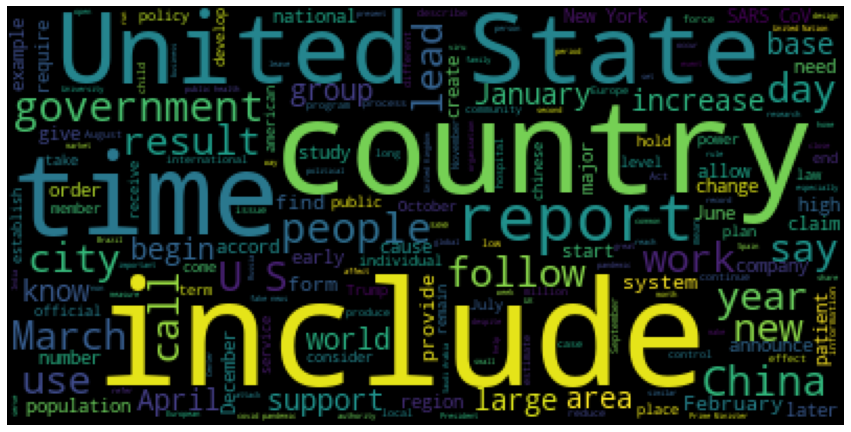

In [19]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud().generate(' '.join(vocab))

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")


In [30]:
with open('wiki.txt', 'w') as filehandle:
    for text in texts:
        filehandle.write('%s\n' % text)
text_file.close()

In [38]:
import numpy as np
np_tweets = np.load("tweets.npy",allow_pickle=True)
covid_train = np_tweets[:9000]
covid_test = np_tweets[9000:]
print(len(covid_train))
print(len(covid_test))

9000
1000


In [39]:
tweets = []
for tweet in covid_test:
    tweets.append(nlp(str(tweet)))
print(len(tweets))

tweet_sentences = []
for tweet in tweets:
    tweet_sents = []
    for sent in tweet.sents:
        tweet_sents.append(sent)
    tweet_sentences.append(tweet_sents)
print(len(tweet_sentences)) 

1000
1000


In [40]:
tweet_vocab = []
for tweet in tweet_sentences:
#     page_tokens = []
    for sent in tweet:
#         sentence_tokens = []
        for token in sent:
            if not token.is_stop and not token.is_punct and token.text is not '\xa0':
                tweet_vocab.append(str(token.lemma_))
#         page_tokens.append(sentence_tokens)
#     tokens.append(page_tokens)
print(len(tweet_vocab))

12929


In [49]:
tweet_vocab_np = np.asarray(tweet_vocab)
vocab_np = np.asarray(vocab)
print(len(tweet_vocab_np))
print(len(np.unique(tweet_vocab_np)))

12929
3893


In [52]:
# word tokens OOV
vocab_set = set(vocab)
token_diff = [x for x in tweet_vocab if x not in vocab_set]
print(len(token_diff))

3126


In [53]:
# Word types OOV
print(len(np.unique(token_diff)))

1657


In [54]:
tweets = []
for tweet in covid_train:
    tweets.append(nlp(str(tweet)))
print(len(tweets))

tweet_sentences = []
for tweet in tweets:
    tweet_sents = []
    for sent in tweet.sents:
        tweet_sents.append(sent)
    tweet_sentences.append(tweet_sents)
print(len(tweet_sentences)) 

9000
9000


In [55]:
tweet_vocab = []
for tweet in tweet_sentences:
#     page_tokens = []
    for sent in tweet:
#         sentence_tokens = []
        for token in sent:
            if not token.is_stop and not token.is_punct and token.text is not '\xa0':
                tweet_vocab.append(str(token.lemma_))
#         page_tokens.append(sentence_tokens)
#     tokens.append(page_tokens)
print(len(tweet_vocab))

116060


In [93]:
tweet_vocab_np = np.asarray(tweet_vocab)
vocab_np = np.asarray(vocab)
print(tweet_vocab_np.shape)
print(len(tweet_vocab_np))
print(len(np.unique(tweet_vocab_np)))

(116060,)
116060
15127


In [57]:
# word tokens OOV
vocab_set = set(vocab)
token_diff = [x for x in tweet_vocab if x not in vocab_set]
print(len(token_diff))

25687


In [58]:
# Word types OOV
print(len(np.unique(token_diff)))

8917


In [59]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm.models import KneserNeyInterpolated
!pip install "nltk==3.4.5"
import numpy as np
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
import regex as re
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import string
from nltk.corpus import stopwords  

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/pkg.7/python3/3.7.9/install/bin/python3.7 -m pip install --upgrade pip' command.


In [86]:
train_sents = []
x = 0
while len(train_sents) < 9000:
    for sent in pages[x].sents:
        train_sents.append(sent)
    x += 1
print(train_sents[8])

train_vocab = []

for sent in train_sents:
    sent_tokens = []
    for token in sent:
        if not token.is_stop and not token.is_punct and token.text is not '\xa0':
            sent_tokens.append(str(token.lemma_))
    train_vocab.append(sent_tokens)
#     tokens.append(page_tokens)
print(len(train_vocab))
train_data, padded_sents = padded_everygram_pipeline(3, train_vocab)
model = KneserNeyInterpolated(ngrams) 
model.fit(train_data,padded_sents)
print(model.counts)
  

People remain infectious for up to two weeks, and can spread the virus even if they do not show symptoms.
9297
<NgramCounter with 3 ngram orders and 481911 ngrams>


In [92]:
i = 0
tri_perplex = 0
tri_test_data, _ = padded_everygram_pipeline(3, train_vocab)
for test in tri_test_data:
    try:
        tri_perplex += model.perplexity(test)
        i += 1
    except ZeroDivisionError:
        i
tri_perplex = tri_perplex/i
print(tri_perplex)

121.92095336010158
